# **Matplotlib**

Matplotlib es una biblioteca completa para crear visualizaciones estáticas, animadas e interactivas en Python.

Es una de las bibliotecas de trazado más populares para Python, funciona muy bien con Pandas y Numpy, altamente personalizable.

Al igual que Numpy y Pandas, Matplotlib es una biblioteca de terceros. Puede instalar Matplotlib en su sistema local usando `pip`.

`pip install matplotlib` , más sobre esto [here](https://matplotlib.org/stable/users/installing/index.html).

In [1]:
# Importación de bibliotecas necesarias

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

%matplotlib inline

De acuerdo con la [Matplotlib documentation](https://matplotlib.org/stable/tutorials/introductory/usage.html#coding-styles), hay 2 formas de usar Matplotlib:
- Crear explícitamente figuras y ejes, y directamente llame a métodos sobre ellos (the "object-oriented (OO) style").
- Utilizar directamente pyplot para crear y administrar automáticamente las figuras y los ejes, y usar las funciones de pyplot para trazar.

Sin embargo, la documentación sugiere usar el estilo OO, particularmente para graficas complicadas y funciones y scripts que están destinados a ser reutilizados como parte de un proyecto más grande. El estilo pyplot puede ser conveniente para un trabajo interactivo rápido

## **Part 1: Llamar a funciones en el módulo pyplot (sin utilizar el  the OOP método)**

### 1.1 Line plot

In [2]:
# Tracemos primero un grafica simple tipo line plop

# Crear un lista de 0 a 9 
# https://numpy.org/doc/stable/reference/generated/numpy.arange.html
x = np.arange(11)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [7]:
# multiplicar la lista por 5
y = x * 5
y

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

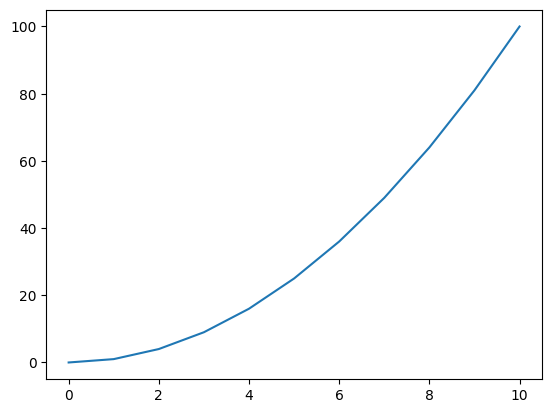

In [6]:
# Trazar un gráfico rápido
plt.plot(x, y)

¿Cómo podemos hacer que esta gráfico sea mejor y más personalizada?

![Anatomy of a plot](https://i.ibb.co/p0kx3c1/anatomy-plot.png)
     

- Podemos agregar título, rotulo al eje x y eje y, leyenda y otras personalizaciones (colores, estilos de línea, estilos de marcador, orientación, cuadrícula y muchos más). La documentación es tu amiga, Matplotlib tiene una documentación muy bien escrita con muchos ejemplos.

Un par de ejemplos:

- [colors](https://matplotlib.org/stable/gallery/color/named_colors.html)
- [marker styles](https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html)
- [grid customization](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html)

In [ ]:
# Mejor gráfico
plt.figure(figsize=(8, 5))
plt.plot(x, y, label="y = 5x", color='y', marker='o', markeredgecolor='k')
# Superposición de datos adicionales en el mismo gráfico
y_add = -y + 50
plt.plot(x, y_add, label="y = -5x + 50", color="blue", marker='D', markeredgecolor='k')
# Agregar el título de la gráfico al personalizar colores y estilos
plt.title("Plotting a function y = 5x and $y = -5x + 50$", fontsize='20')
# Rotulando los ejes x e y 
plt.xlabel("x value", fontsize='12')
plt.ylabel("y value", fontsize='12')
# Agregar la leyenda, otras opciones de ubicación: 'mejor', 'superior izquierda', 'inferior izquierda', 'inferior derecha'
plt.legend(loc="best")
# Agregar una cuadrícula, podría ser solo vertical o solo horizontal
plt.grid(alpha=0.5)
# Personalización de los valores de marca en los ejes x e y
plt.xticks(ticks=x)
plt.yticks(ticks=y)
# Para no mostrar la información adicional
plt.show()

### 1.2 Scatter plot

In [ ]:
# Tracemos scatter plot

# Generar de 500 números aleatorios a partir de una distribución normal estándar
x=np.random.randn(500)
y=np.random.randn(500)

# Se puede especificar la palabra clave 'figsize' en plt.figure() para cambiar el tamaño de la figura
plt.figure(figsize=(10,8))

# Usar plt.scatter para graficar scatter plot
# Puede especificar palabras clave: 'c' o 'color' para especificar el color, podría estar en hexadecimal 
# 's' para especificar el tamaño del marcador, 'marker' para especificar el tipo de marcador
plt.scatter(x,y, label='scatter plot', color='#711cfc', s=10, marker= 'o')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()

plt.title('Plotting scatter plot')

plt.show()

### 1.3 Histogram

In [ ]:
# Leamos los datos de 'mini_cast.zip' en un dataframe
df = pd.read_csv('mini_cast.zip')
# Mire las primeras 5 filas de la dataframe
df.head()

In [ ]:
# Tracemos un histogram de años en esto dataframe.
# Además de matrices numpy, también puede usar series de pandas, listas de Python para trazar.

plt.figure(figsize=(10,6))
plt.hist(df['year'].values.tolist(), color='gold', edgecolor='k', bins=15)

plt.xlabel('Year', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.title('Histogram of year', fontsize=18)
plt.show()

## **Parte 2: Object oriented (OOP) method**

**Figure** - una clase que representa la figura completa. La figura realiza un seguimiento de todos los ejes secundarios.

**Axes** - una clase adjunta a una ```Figura``` que contiene una región para graficar datos, y normalmente incluye dos (o tres en el caso de 3D) objetos ```Axis```.

**Axis** - una clase que establece la escala y los límites y genera ticks (las marcas en el eje) y ticklabels (cadenas que etiquetan los ticks).

Más sobre las clases utilizadas [here](https://matplotlib.org/stable/tutorials/introductory/usage.html#parts-of-a-figure).

<p style="text-align: center;">Anatomy of Figure and Axes</p>

![Anatomy of figure and axes](https://i.ibb.co/cxWrsjq/anatomy-subplots-1.jpg)

### 2.1 Line plot (usando el metodo OOP )

Vamos a replicar exactamente lo mismo que hicimos en 1.1 pero ahora llamando explícitamente a los objetos.

In [ ]:
# Una de las formas de trabajar con la clases de Figure y Axes  es crear un Figure object,
# y luego crear objetos Axes a partir de él.

# Crear Figure object
fig = plt.figure()

# Imprimir el tipo de fig
print(type(fig))

In [ ]:
# Crear Figure object de un tamaño personalizado (ancho, alto) en pulgadas.
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
fig = plt.figure(figsize=(4, 3))

x = np.arange(1,11,1)
y = x * 5

# Ahora podemos agregar Axes al objeto Figure.
# Las dimensiones [izquierda, abajo, ancho, alto] del nuevo Axes. 
# Todas las cantidades están en fracciones del ancho y alto de la figura.
ax2 = fig.add_axes([0, 0, 1, 1])
ax1 = fig.add_axes([0, 1, 1, 1])

# Plot() es un método en la clase Axes que se utiliza para trazar nuestros datos
ax1.plot(x, y, label='Function y = 5x')

# Etioquetando los ejes x e y 
ax1.set_xlabel('x value')
ax1.set_ylabel('y value')

# Poniendo un título a nuestra figura
ax1.set_title('Plotting a function y=5x')

plt.show()

#### **¿Has notado algo diferente en los métodos 1.1 y 1.2?**
> ATTN: Los métodos Figure son diferentes de los métodos Axes! Por lo general, los métodos Axes tendrían *"set_"* delante del método Figure equivalente.

Ejemplos:

```fig.xlabel()``` vs ```ax.set_xlabel()```

```fig.title()``` vs ```ax.set_title()```

## **Parte 3: Subgraficos**

In [ ]:
# Alternativamente, podemos crear los objetos Figure y Axes simultáneamente.
# https://matplotlib.org/stable/tutorials/introductory/usage.html#figure
fig, ax = plt.subplots()  # a figure with a single Axes

In [ ]:
# Creación de múltiples ejes en la figura.
fig, ax = plt.subplots(nrows=2, ncols=2)

# Imprimamos los tipos de fig y ax devueltos por plt.subplots()
print(f'The type of fig is {type(fig)}')
print(f'The type of ax is {type(ax)} \n')

print(ax)

* Podemos ver que cuando creamos varios ejes en la misma figura, plt.subplots devuelve el objeto de la figura actual y una numpy array de objetos de ejes, cada uno correspondiente a cada eje (subgrafica).
* Aquí, las gráficos están vacíos porque no hemos trazado nada en los ejes..

In [ ]:
# Vamos a trazar lo mismo y=x**2 y y=x**3 en diferentes gráficos en la misma figura.

# Generar 200 puntos uniformemente espaciados entre -2 y 2
# start, stop(including!), number 
x = np.linspace(-2,2,200)

y_2 = x**2
y_3 = x**3

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12,5))

# Accedemos a los primeros ejes usando ax[0]
# Trazar y=x**2 on the first axes
ax[0].plot(x,y_2, label='$y=x^2$')

# Cada eje tiene su propio rotulo, titulo, leyenda.
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[0].legend(loc='upper center')
ax[0].set_title('Plot of $Y=X^2$')


# Trazar y=x**3 sobre el segudno eje
ax[1].plot(x,y_3, label='$y=x^3$', color='orange')

ax[1].set_xlabel('x')
ax[1].set_ylabel('y')

ax[1].legend(loc='upper center')
ax[1].set_title('Plot of $y=x^3$')

#Podemos titular toda la figura usando fig.suptitle()
fig.suptitle('Plots of both $y=x^2$ and $y=x^3$ on different axes', fontsize=15)

# Puede guardar sus figuras/gráficos usando plt.savefig()
plt.savefig('plot_x_x2.jpg', dpi=150)

plt.show()

#### Usar ax.ravel() para aplanar la matriz de ejes
Como vimos arriba, los ejes están formando una matriz, también conocida como matriz 2D. Podemos "aplanarlo" para facilitar el trazado.

In [ ]:
# Conceptual check
array_2D = np.arange(9).reshape((3, 3))
array_2D

In [ ]:
array_2D.ravel()

In [ ]:
array_2D.flat

In [ ]:
list(array_2D.flat)

Cuando se trabaja con Axes, ```ax.ravel()``` hace lo mismo con la matriz 2D de Axes:

In [ ]:
# Tracemos 5 y=x**k desde k=1 a 5 usando subplots

x=np.linspace(-1,1,100)

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(15, 8))
fig.tight_layout(pad=5)
# Vamos a colorear cada gráfico de manera diferente.
colors_list=['r','g','b','orange','grey']


# Para i, ax en  enumerate(axes.ravel()[:5]):
for i in range(5):
    ax = axes.ravel()[i]
    ax.plot(x, x**(i+1), color=colors_list[i])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'$y=x^{i+1}$')

fig.suptitle(f'Plots of $y=x^k$, with k from 1 to 5', fontsize=15)
plt.show()

Podemos ver que los últimos axes se dejan vacíos pero los ejes aún están presentes. (No confunda axes con axis) /n Podemos evitar esto usando plt.subplot en su lugar.

## **Parte 4: Subplot**

In [ ]:
fig=plt.figure(figsize=(15, 8))


for i in range(5):
    # siendo un ejemplo intuitivo
    # cuando i = 1
    # Tenemos ax = plt.subplot(232), 2 filas, 3 columnas y 2da posición
    ax=plt.subplot(230 + i + 1) # 2 rows 3 columns and ith index
    ax.plot(x, x ** (i+1), color=colors_list[i])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'$y=x^{i+1}$')

fig.tight_layout(pad=5)
fig.suptitle('Plots of $y=x^k$, with k from 1 to 5', fontsize=15)
plt.show()

La principal diferencia entre plt.subplot y plt.subplots es que plt.subplots crea primero todos los ejes y los dibuja, mientras que plt.subplot crea cada uno sobre la marcha.

# 📊 Exploracion de datos utilizando Seaborn (sns) 🎨

Seaborn: High-level plotting with dataframes

`Seaborn` es una biblioteca de alto nivel basada en `Matplotlib` que presenta formas más fáciles de trazar hermosas figuras usando `pandas.DataFrame`. Es compatible con `Matplotlib`, por lo que es posible modificar aún más los detalles utilizando este último.


Seaborn (sns) es una biblioteca de visualización de datos en Python que ofrece una interfaz de alto nivel para crear gráficos atractivos y informativos. Con Seaborn, puedes crear rápidamente visualizaciones sofisticadas, como gráficos de dispersión, gráficos de barras, histogramas, gráficos de caja y mucho más. Además, Seaborn proporciona una amplia gama de opciones de personalización para adaptar tus gráficos a tus necesidades. Para obtener más información y explorar todas las características de Seaborn, visita la documentación oficial en este enlace.

In [1]:
import seaborn as sns

# Cargar un dataset incorporado en Seaborn
dataset = sns.load_dataset("tips")

# Visualizar los primeros registros del dataset
dataset.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

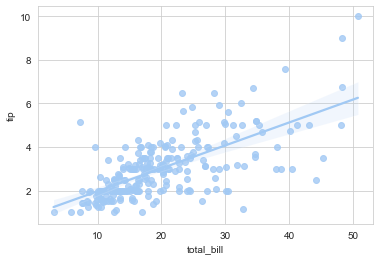

In [8]:
# # Personalizar el estilo de los gráficos con Seaborn
# sns.set_style("whitegrid")
# sns.set_palette("pastel")


In [ ]:

# Crear un gráfico de dispersión (scatter plot) con regresión lineal
sns.regplot(x="total_bill", y="tip", data=dataset)


<Axes: xlabel='day', ylabel='tip'>

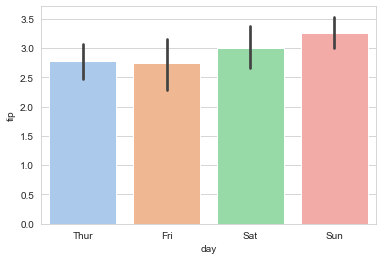

In [9]:

# Crear un gráfico de barras (bar plot) de promedio de propinas por día
sns.barplot(x="day", y="tip", data=dataset)


<Axes: xlabel='total_bill', ylabel='Count'>

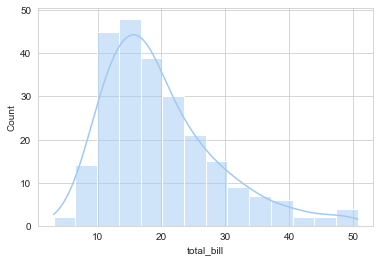

In [10]:

# Crear un histograma (histogram plot) de la distribución de total_bill
sns.histplot(data=dataset, x="total_bill", kde=True)


<Axes: xlabel='day', ylabel='tip'>

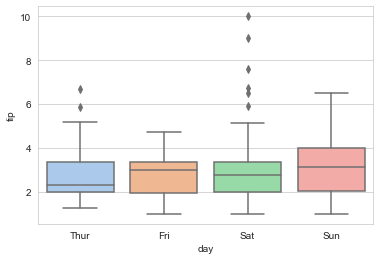

In [11]:

# Crear un gráfico de caja (box plot) de las propinas según el día de la semana
sns.boxplot(x="day", y="tip", data=dataset)


C:\Users\Hugo Condori\AppData\Local\Temp\ipykernel_22056\3331364450.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


<Axes: >

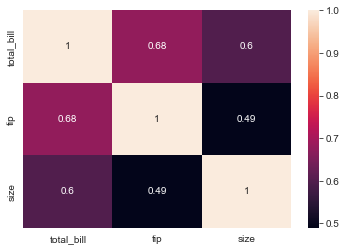

In [12]:

# Crear un mapa de calor (heatmap) para visualizar la correlación entre variables
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True)
